In [38]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [41]:
img_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../Dataset/train_data',
    shuffle = True,
    image_size = (256, 256),
    batch_size = 32)
class_names = img_dataset.class_names
print(class_names)

Found 2000 files belonging to 2 classes.
['Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [10]:
data_directory = '../Dataset/train_data'

# Define image data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Percentage of data to use for validation
)

# Load and split the dataset into training and testing sets
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    seed=42
)


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [11]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
50/50 [==============================] - 45s 898ms/step - loss: 0.4778 - accuracy: 0.7856 - val_loss: 0.1748 - val_accuracy: 0.9400
Epoch 2/10
50/50 [==============================] - 45s 902ms/step - loss: 0.1445 - accuracy: 0.9444 - val_loss: 0.0995 - val_accuracy: 0.9575
Epoch 3/10
50/50 [==============================] - 45s 900ms/step - loss: 0.0973 - accuracy: 0.9663 - val_loss: 0.0730 - val_accuracy: 0.9625
Epoch 4/10
50/50 [==============================] - 46s 917ms/step - loss: 0.1036 - accuracy: 0.9588 - val_loss: 0.0693 - val_accuracy: 0.9800
Epoch 5/10
50/50 [==============================] - 45s 908ms/step - loss: 0.0784 - accuracy: 0.9719 - val_loss: 0.1369 - val_accuracy: 0.9475
Epoch 6/10
50/50 [==============================] - 45s 900ms/step - loss: 0.0717 - accuracy: 0.9737 - val_loss: 0.1063 - val_accuracy: 0.9500
Epoch 7/10
50/50 [==============================] - 45s 899ms/step - loss: 0.0992 - accuracy: 0.9631 - val_loss: 0.0732 - val_accuracy: 0.9750

In [13]:
model.save('classsifier.keras')

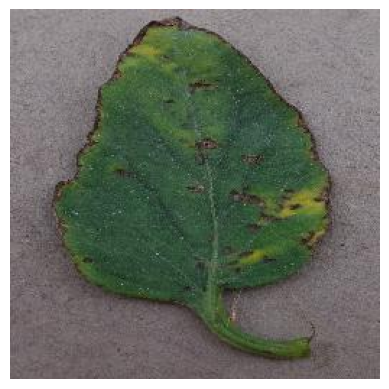

1/1 [==============================] - 0s 29ms/step
Tomato___Bacterial_spot


In [42]:
# Load the test image
img_path =r'..\Dataset\test_data\Tomato___Bacterial_spot\0ab41c2e-c6fc-4ef1-9ffb-ce1b241d32be___GCREC_Bact.Sp 3426.JPG'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0 

plt.imshow(img)
plt.axis('off') 
plt.show()

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print(predicted_class)